자동중단기능 포함시켜봄. 과적합방지

In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint,EarlyStopping

import pandas as pd
import numpy
import os
import tensorflow as tf

Using TensorFlow backend.


In [2]:
numpy.random.seed(3)
tf.random.set_seed(3)

In [3]:
df_pre = pd.read_csv('D:\\ai\\Software Practical Use and Coding\\13\\wine.csv', header=None)

In [4]:
df_pre

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


데이터셋 중에서 일부만을 선택해서 사용하는 방식

* sample( ) 함수를 사용하여 원본 데이터의 몇 %를 사용할지를 결정한다.
frac = 1 이라고 지정하면 원본 데이터의 100% 를 불러오라는 의미

In [5]:
df = df_pre.sample(frac=0.15)

In [6]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
6245,5.9,0.180,0.28,1.00,0.037,24.0,88.0,0.99094,3.29,0.55,10.65,7,0
486,10.2,0.670,0.39,1.90,0.054,6.0,17.0,0.99760,3.17,0.47,10.00,5,1
273,8.4,0.715,0.20,2.40,0.076,10.0,38.0,0.99735,3.31,0.64,9.40,5,1
1993,6.8,0.370,0.51,11.80,0.044,62.0,163.0,0.99760,3.19,0.44,8.80,5,0
885,8.9,0.750,0.14,2.50,0.086,9.0,30.0,0.99824,3.34,0.64,10.50,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,8.2,0.570,0.26,2.20,0.060,28.0,65.0,0.99590,3.30,0.43,10.10,5,1
2584,6.0,0.410,0.21,1.90,0.050,29.0,122.0,0.99280,3.42,0.52,10.50,6,0
4446,5.8,0.200,0.34,1.00,0.035,40.0,86.0,0.98993,3.50,0.42,11.70,5,0
3471,5.8,0.330,0.20,16.05,0.047,26.0,166.0,0.99760,3.09,0.46,8.90,5,0


In [7]:
dataset = df.values
X = dataset[:,0:12]
Y = dataset[:,12]

In [8]:
X

array([[ 5.9  ,  0.18 ,  0.28 , ...,  0.55 , 10.65 ,  7.   ],
       [10.2  ,  0.67 ,  0.39 , ...,  0.47 , 10.   ,  5.   ],
       [ 8.4  ,  0.715,  0.2  , ...,  0.64 ,  9.4  ,  5.   ],
       ...,
       [ 5.8  ,  0.2  ,  0.34 , ...,  0.42 , 11.7  ,  5.   ],
       [ 5.8  ,  0.33 ,  0.2  , ...,  0.46 ,  8.9  ,  5.   ],
       [ 6.2  ,  0.47 ,  0.21 , ...,  0.46 ,  9.2  ,  5.   ]])

레드와인 : 1 / 화이트와인 : 0

In [9]:
Y

array([0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0.,
       0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 0., 0.

In [10]:
model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

epoch마다 딥러닝 모델을 저장할 폴더생성

In [11]:
MODEL_DIR = './model_save/'
if not os.path.exists(MODEL_DIR):
   os.mkdir(MODEL_DIR)

In [12]:
#파일명에 epoch와 val_loss를 기록하도록 설정 
modelpath="./model_save/{epoch:02d}-{val_loss:.4f}.hdf5" 

# 모델 업데이트 및 저장
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

In [13]:
# 학습 자동 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)

In [14]:
# 사이킷런을 사용하지 않고, 
# 모델 실행 과정에서 홀드 아웃 교차 검증(Holdout Cross Validation) 사용 - 테스트 데이터셋을 20%로 설정 

history = model.fit(X, Y, validation_split=0.2, epochs=3000, batch_size=500, verbose=2, callbacks=[checkpointer,early_stopping_callback])

Train on 780 samples, validate on 195 samples
Epoch 1/3000
 - 0s - loss: 1.2415 - accuracy: 0.7256 - val_loss: 0.7791 - val_accuracy: 0.7744

Epoch 00001: val_loss improved from inf to 0.77907, saving model to ./model_save/01-0.7791.hdf5
Epoch 2/3000
 - 0s - loss: 1.0532 - accuracy: 0.7256 - val_loss: 0.6566 - val_accuracy: 0.7744

Epoch 00002: val_loss improved from 0.77907 to 0.65665, saving model to ./model_save/02-0.6566.hdf5
Epoch 3/3000
 - 0s - loss: 0.8796 - accuracy: 0.7256 - val_loss: 0.5557 - val_accuracy: 0.7744

Epoch 00003: val_loss improved from 0.65665 to 0.55570, saving model to ./model_save/03-0.5557.hdf5
Epoch 4/3000
 - 0s - loss: 0.7424 - accuracy: 0.7256 - val_loss: 0.4743 - val_accuracy: 0.7744

Epoch 00004: val_loss improved from 0.55570 to 0.47428, saving model to ./model_save/04-0.4743.hdf5
Epoch 5/3000
 - 0s - loss: 0.6306 - accuracy: 0.7256 - val_loss: 0.4092 - val_accuracy: 0.7744

Epoch 00005: val_loss improved from 0.47428 to 0.40921, saving model to ./mode


Epoch 00045: val_loss improved from 0.25559 to 0.25443, saving model to ./model_save/45-0.2544.hdf5
Epoch 46/3000
 - 0s - loss: 0.3205 - accuracy: 0.9038 - val_loss: 0.2538 - val_accuracy: 0.9282

Epoch 00046: val_loss improved from 0.25443 to 0.25383, saving model to ./model_save/46-0.2538.hdf5
Epoch 47/3000
 - 0s - loss: 0.3188 - accuracy: 0.9051 - val_loss: 0.2528 - val_accuracy: 0.9333

Epoch 00047: val_loss improved from 0.25383 to 0.25275, saving model to ./model_save/47-0.2528.hdf5
Epoch 48/3000
 - 0s - loss: 0.3170 - accuracy: 0.9051 - val_loss: 0.2509 - val_accuracy: 0.9385

Epoch 00048: val_loss improved from 0.25275 to 0.25085, saving model to ./model_save/48-0.2509.hdf5
Epoch 49/3000
 - 0s - loss: 0.3153 - accuracy: 0.9064 - val_loss: 0.2494 - val_accuracy: 0.9385

Epoch 00049: val_loss improved from 0.25085 to 0.24940, saving model to ./model_save/49-0.2494.hdf5
Epoch 50/3000
 - 0s - loss: 0.3135 - accuracy: 0.9064 - val_loss: 0.2474 - val_accuracy: 0.9385

Epoch 00050: v

Epoch 88/3000
 - 0s - loss: 0.2558 - accuracy: 0.9321 - val_loss: 0.1974 - val_accuracy: 0.9436

Epoch 00088: val_loss improved from 0.19825 to 0.19738, saving model to ./model_save/88-0.1974.hdf5
Epoch 89/3000
 - 0s - loss: 0.2546 - accuracy: 0.9333 - val_loss: 0.1956 - val_accuracy: 0.9487

Epoch 00089: val_loss improved from 0.19738 to 0.19561, saving model to ./model_save/89-0.1956.hdf5
Epoch 90/3000
 - 0s - loss: 0.2534 - accuracy: 0.9308 - val_loss: 0.1933 - val_accuracy: 0.9487

Epoch 00090: val_loss improved from 0.19561 to 0.19330, saving model to ./model_save/90-0.1933.hdf5
Epoch 91/3000
 - 0s - loss: 0.2522 - accuracy: 0.9308 - val_loss: 0.1917 - val_accuracy: 0.9487

Epoch 00091: val_loss improved from 0.19330 to 0.19172, saving model to ./model_save/91-0.1917.hdf5
Epoch 92/3000
 - 0s - loss: 0.2510 - accuracy: 0.9308 - val_loss: 0.1908 - val_accuracy: 0.9487

Epoch 00092: val_loss improved from 0.19172 to 0.19077, saving model to ./model_save/92-0.1908.hdf5
Epoch 93/3000
 


Epoch 00133: val_loss improved from 0.16329 to 0.16137, saving model to ./model_save/133-0.1614.hdf5
Epoch 134/3000
 - 0s - loss: 0.2161 - accuracy: 0.9397 - val_loss: 0.1603 - val_accuracy: 0.9538

Epoch 00134: val_loss improved from 0.16137 to 0.16028, saving model to ./model_save/134-0.1603.hdf5
Epoch 135/3000
 - 0s - loss: 0.2151 - accuracy: 0.9397 - val_loss: 0.1585 - val_accuracy: 0.9487

Epoch 00135: val_loss improved from 0.16028 to 0.15848, saving model to ./model_save/135-0.1585.hdf5
Epoch 136/3000
 - 0s - loss: 0.2149 - accuracy: 0.9397 - val_loss: 0.1585 - val_accuracy: 0.9538

Epoch 00136: val_loss improved from 0.15848 to 0.15848, saving model to ./model_save/136-0.1585.hdf5
Epoch 137/3000
 - 0s - loss: 0.2141 - accuracy: 0.9397 - val_loss: 0.1601 - val_accuracy: 0.9538

Epoch 00137: val_loss did not improve from 0.15848
Epoch 138/3000
 - 0s - loss: 0.2136 - accuracy: 0.9397 - val_loss: 0.1626 - val_accuracy: 0.9590

Epoch 00138: val_loss did not improve from 0.15848
Epo


Epoch 00183: val_loss did not improve from 0.14125
Epoch 184/3000
 - 0s - loss: 0.1907 - accuracy: 0.9423 - val_loss: 0.1411 - val_accuracy: 0.9590

Epoch 00184: val_loss improved from 0.14125 to 0.14112, saving model to ./model_save/184-0.1411.hdf5
Epoch 185/3000
 - 0s - loss: 0.1912 - accuracy: 0.9410 - val_loss: 0.1423 - val_accuracy: 0.9590

Epoch 00185: val_loss did not improve from 0.14112
Epoch 186/3000
 - 0s - loss: 0.1893 - accuracy: 0.9410 - val_loss: 0.1469 - val_accuracy: 0.9590

Epoch 00186: val_loss did not improve from 0.14112
Epoch 187/3000
 - 0s - loss: 0.1893 - accuracy: 0.9462 - val_loss: 0.1534 - val_accuracy: 0.9590

Epoch 00187: val_loss did not improve from 0.14112
Epoch 188/3000
 - 0s - loss: 0.1907 - accuracy: 0.9449 - val_loss: 0.1500 - val_accuracy: 0.9590

Epoch 00188: val_loss did not improve from 0.14112
Epoch 189/3000
 - 0s - loss: 0.1892 - accuracy: 0.9449 - val_loss: 0.1462 - val_accuracy: 0.9590

Epoch 00189: val_loss did not improve from 0.14112
Epoc


Epoch 00234: val_loss did not improve from 0.12908
Epoch 235/3000
 - 0s - loss: 0.1685 - accuracy: 0.9474 - val_loss: 0.1343 - val_accuracy: 0.9590

Epoch 00235: val_loss did not improve from 0.12908
Epoch 236/3000
 - 0s - loss: 0.1683 - accuracy: 0.9474 - val_loss: 0.1320 - val_accuracy: 0.9641

Epoch 00236: val_loss did not improve from 0.12908
Epoch 237/3000
 - 0s - loss: 0.1676 - accuracy: 0.9462 - val_loss: 0.1291 - val_accuracy: 0.9641

Epoch 00237: val_loss did not improve from 0.12908
Epoch 238/3000
 - 0s - loss: 0.1675 - accuracy: 0.9462 - val_loss: 0.1286 - val_accuracy: 0.9641

Epoch 00238: val_loss improved from 0.12908 to 0.12861, saving model to ./model_save/238-0.1286.hdf5
Epoch 239/3000
 - 0s - loss: 0.1675 - accuracy: 0.9462 - val_loss: 0.1303 - val_accuracy: 0.9692

Epoch 00239: val_loss did not improve from 0.12861
Epoch 240/3000
 - 0s - loss: 0.1664 - accuracy: 0.9462 - val_loss: 0.1302 - val_accuracy: 0.9641

Epoch 00240: val_loss did not improve from 0.12861
Epoc


Epoch 00284: val_loss did not improve from 0.11671
Epoch 285/3000
 - 0s - loss: 0.1475 - accuracy: 0.9513 - val_loss: 0.1246 - val_accuracy: 0.9590

Epoch 00285: val_loss did not improve from 0.11671
Epoch 286/3000
 - 0s - loss: 0.1486 - accuracy: 0.9577 - val_loss: 0.1215 - val_accuracy: 0.9641

Epoch 00286: val_loss did not improve from 0.11671
Epoch 287/3000
 - 0s - loss: 0.1492 - accuracy: 0.9513 - val_loss: 0.1156 - val_accuracy: 0.9692

Epoch 00287: val_loss improved from 0.11671 to 0.11561, saving model to ./model_save/287-0.1156.hdf5
Epoch 288/3000
 - 0s - loss: 0.1478 - accuracy: 0.9500 - val_loss: 0.1183 - val_accuracy: 0.9641

Epoch 00288: val_loss did not improve from 0.11561
Epoch 289/3000
 - 0s - loss: 0.1473 - accuracy: 0.9526 - val_loss: 0.1193 - val_accuracy: 0.9641

Epoch 00289: val_loss did not improve from 0.11561
Epoch 290/3000
 - 0s - loss: 0.1457 - accuracy: 0.9526 - val_loss: 0.1164 - val_accuracy: 0.9744

Epoch 00290: val_loss did not improve from 0.11561
Epoc


Epoch 00336: val_loss did not improve from 0.10746
Epoch 337/3000
 - 0s - loss: 0.1299 - accuracy: 0.9654 - val_loss: 0.1089 - val_accuracy: 0.9641

Epoch 00337: val_loss did not improve from 0.10746
Epoch 338/3000
 - 0s - loss: 0.1301 - accuracy: 0.9679 - val_loss: 0.1094 - val_accuracy: 0.9692

Epoch 00338: val_loss did not improve from 0.10746
Epoch 339/3000
 - 0s - loss: 0.1293 - accuracy: 0.9654 - val_loss: 0.1068 - val_accuracy: 0.9641

Epoch 00339: val_loss improved from 0.10746 to 0.10677, saving model to ./model_save/339-0.1068.hdf5
Epoch 340/3000
 - 0s - loss: 0.1303 - accuracy: 0.9628 - val_loss: 0.1086 - val_accuracy: 0.9641

Epoch 00340: val_loss did not improve from 0.10677
Epoch 341/3000
 - 0s - loss: 0.1289 - accuracy: 0.9667 - val_loss: 0.1153 - val_accuracy: 0.9744

Epoch 00341: val_loss did not improve from 0.10677
Epoch 342/3000
 - 0s - loss: 0.1302 - accuracy: 0.9679 - val_loss: 0.1076 - val_accuracy: 0.9641

Epoch 00342: val_loss did not improve from 0.10677
Epoc

 - 0s - loss: 0.1179 - accuracy: 0.9692 - val_loss: 0.1002 - val_accuracy: 0.9692

Epoch 00389: val_loss did not improve from 0.10002
Epoch 390/3000
 - 0s - loss: 0.1180 - accuracy: 0.9692 - val_loss: 0.1006 - val_accuracy: 0.9692

Epoch 00390: val_loss did not improve from 0.10002
Epoch 391/3000
 - 0s - loss: 0.1178 - accuracy: 0.9705 - val_loss: 0.1042 - val_accuracy: 0.9744

Epoch 00391: val_loss did not improve from 0.10002
Epoch 392/3000
 - 0s - loss: 0.1172 - accuracy: 0.9731 - val_loss: 0.1002 - val_accuracy: 0.9692

Epoch 00392: val_loss did not improve from 0.10002
Epoch 393/3000
 - 0s - loss: 0.1170 - accuracy: 0.9692 - val_loss: 0.0986 - val_accuracy: 0.9692

Epoch 00393: val_loss improved from 0.10002 to 0.09862, saving model to ./model_save/393-0.0986.hdf5
Epoch 394/3000
 - 0s - loss: 0.1168 - accuracy: 0.9692 - val_loss: 0.1015 - val_accuracy: 0.9744

Epoch 00394: val_loss did not improve from 0.09862
Epoch 395/3000
 - 0s - loss: 0.1161 - accuracy: 0.9718 - val_loss: 0.10


Epoch 00441: val_loss did not improve from 0.09371
Epoch 442/3000
 - 0s - loss: 0.1074 - accuracy: 0.9744 - val_loss: 0.0933 - val_accuracy: 0.9692

Epoch 00442: val_loss improved from 0.09371 to 0.09334, saving model to ./model_save/442-0.0933.hdf5
Epoch 443/3000
 - 0s - loss: 0.1083 - accuracy: 0.9718 - val_loss: 0.0939 - val_accuracy: 0.9744

Epoch 00443: val_loss did not improve from 0.09334
Epoch 444/3000
 - 0s - loss: 0.1070 - accuracy: 0.9731 - val_loss: 0.0943 - val_accuracy: 0.9744

Epoch 00444: val_loss did not improve from 0.09334
Epoch 445/3000
 - 0s - loss: 0.1070 - accuracy: 0.9731 - val_loss: 0.0955 - val_accuracy: 0.9744

Epoch 00445: val_loss did not improve from 0.09334
Epoch 446/3000
 - 0s - loss: 0.1065 - accuracy: 0.9744 - val_loss: 0.0947 - val_accuracy: 0.9744

Epoch 00446: val_loss did not improve from 0.09334
Epoch 447/3000
 - 0s - loss: 0.1063 - accuracy: 0.9744 - val_loss: 0.0944 - val_accuracy: 0.9744

Epoch 00447: val_loss did not improve from 0.09334
Epoc


Epoch 00494: val_loss did not improve from 0.08881
Epoch 495/3000
 - 0s - loss: 0.1004 - accuracy: 0.9744 - val_loss: 0.0917 - val_accuracy: 0.9744

Epoch 00495: val_loss did not improve from 0.08881
Epoch 496/3000
 - 0s - loss: 0.0983 - accuracy: 0.9744 - val_loss: 0.0887 - val_accuracy: 0.9795

Epoch 00496: val_loss improved from 0.08881 to 0.08870, saving model to ./model_save/496-0.0887.hdf5
Epoch 497/3000
 - 0s - loss: 0.0988 - accuracy: 0.9756 - val_loss: 0.0878 - val_accuracy: 0.9795

Epoch 00497: val_loss improved from 0.08870 to 0.08781, saving model to ./model_save/497-0.0878.hdf5
Epoch 498/3000
 - 0s - loss: 0.0991 - accuracy: 0.9756 - val_loss: 0.0920 - val_accuracy: 0.9744

Epoch 00498: val_loss did not improve from 0.08781
Epoch 499/3000
 - 0s - loss: 0.0991 - accuracy: 0.9756 - val_loss: 0.0992 - val_accuracy: 0.9744

Epoch 00499: val_loss did not improve from 0.08781
Epoch 500/3000
 - 0s - loss: 0.0999 - accuracy: 0.9756 - val_loss: 0.0884 - val_accuracy: 0.9795

Epoch


Epoch 00546: val_loss did not improve from 0.08567
Epoch 547/3000
 - 0s - loss: 0.0907 - accuracy: 0.9756 - val_loss: 0.0869 - val_accuracy: 0.9846

Epoch 00547: val_loss did not improve from 0.08567
Epoch 548/3000
 - 0s - loss: 0.0905 - accuracy: 0.9756 - val_loss: 0.0859 - val_accuracy: 0.9846

Epoch 00548: val_loss did not improve from 0.08567
Epoch 549/3000
 - 0s - loss: 0.0906 - accuracy: 0.9756 - val_loss: 0.0858 - val_accuracy: 0.9846

Epoch 00549: val_loss did not improve from 0.08567
Epoch 550/3000
 - 0s - loss: 0.0904 - accuracy: 0.9756 - val_loss: 0.0865 - val_accuracy: 0.9846

Epoch 00550: val_loss did not improve from 0.08567
Epoch 551/3000
 - 0s - loss: 0.0900 - accuracy: 0.9756 - val_loss: 0.0876 - val_accuracy: 0.9846

Epoch 00551: val_loss did not improve from 0.08567
Epoch 552/3000
 - 0s - loss: 0.0904 - accuracy: 0.9769 - val_loss: 0.0876 - val_accuracy: 0.9846

Epoch 00552: val_loss did not improve from 0.08567
Epoch 553/3000
 - 0s - loss: 0.0897 - accuracy: 0.9769


Epoch 00599: val_loss improved from 0.08096 to 0.08095, saving model to ./model_save/599-0.0810.hdf5
Epoch 600/3000
 - 0s - loss: 0.0845 - accuracy: 0.9756 - val_loss: 0.0879 - val_accuracy: 0.9795

Epoch 00600: val_loss did not improve from 0.08095
Epoch 601/3000
 - 0s - loss: 0.0849 - accuracy: 0.9795 - val_loss: 0.0904 - val_accuracy: 0.9795

Epoch 00601: val_loss did not improve from 0.08095
Epoch 602/3000
 - 0s - loss: 0.0850 - accuracy: 0.9795 - val_loss: 0.0819 - val_accuracy: 0.9846

Epoch 00602: val_loss did not improve from 0.08095
Epoch 603/3000
 - 0s - loss: 0.0833 - accuracy: 0.9756 - val_loss: 0.0813 - val_accuracy: 0.9846

Epoch 00603: val_loss did not improve from 0.08095
Epoch 604/3000
 - 0s - loss: 0.0839 - accuracy: 0.9769 - val_loss: 0.0839 - val_accuracy: 0.9795

Epoch 00604: val_loss did not improve from 0.08095
Epoch 605/3000
 - 0s - loss: 0.0824 - accuracy: 0.9808 - val_loss: 0.0853 - val_accuracy: 0.9795

Epoch 00605: val_loss did not improve from 0.08095
Epoc


Epoch 00653: val_loss did not improve from 0.07860
Epoch 654/3000
 - 0s - loss: 0.0762 - accuracy: 0.9795 - val_loss: 0.0815 - val_accuracy: 0.9795

Epoch 00654: val_loss did not improve from 0.07860
Epoch 655/3000
 - 0s - loss: 0.0763 - accuracy: 0.9782 - val_loss: 0.0823 - val_accuracy: 0.9795

Epoch 00655: val_loss did not improve from 0.07860
Epoch 656/3000
 - 0s - loss: 0.0762 - accuracy: 0.9795 - val_loss: 0.0837 - val_accuracy: 0.9795

Epoch 00656: val_loss did not improve from 0.07860
Epoch 657/3000
 - 0s - loss: 0.0763 - accuracy: 0.9795 - val_loss: 0.0808 - val_accuracy: 0.9795

Epoch 00657: val_loss did not improve from 0.07860
Epoch 658/3000
 - 0s - loss: 0.0759 - accuracy: 0.9795 - val_loss: 0.0814 - val_accuracy: 0.9795

Epoch 00658: val_loss did not improve from 0.07860
Epoch 659/3000
 - 0s - loss: 0.0755 - accuracy: 0.9795 - val_loss: 0.0838 - val_accuracy: 0.9795

Epoch 00659: val_loss did not improve from 0.07860
Epoch 660/3000
 - 0s - loss: 0.0758 - accuracy: 0.9782


Epoch 00706: val_loss did not improve from 0.07556
Epoch 707/3000
 - 0s - loss: 0.0699 - accuracy: 0.9808 - val_loss: 0.0755 - val_accuracy: 0.9744

Epoch 00707: val_loss improved from 0.07556 to 0.07549, saving model to ./model_save/707-0.0755.hdf5
Epoch 708/3000
 - 0s - loss: 0.0701 - accuracy: 0.9808 - val_loss: 0.0762 - val_accuracy: 0.9744

Epoch 00708: val_loss did not improve from 0.07549
Epoch 709/3000
 - 0s - loss: 0.0698 - accuracy: 0.9795 - val_loss: 0.0799 - val_accuracy: 0.9795

Epoch 00709: val_loss did not improve from 0.07549
Epoch 710/3000
 - 0s - loss: 0.0716 - accuracy: 0.9808 - val_loss: 0.0803 - val_accuracy: 0.9744

Epoch 00710: val_loss did not improve from 0.07549
Epoch 711/3000
 - 0s - loss: 0.0691 - accuracy: 0.9795 - val_loss: 0.0739 - val_accuracy: 0.9744

Epoch 00711: val_loss improved from 0.07549 to 0.07391, saving model to ./model_save/711-0.0739.hdf5
Epoch 712/3000
 - 0s - loss: 0.0724 - accuracy: 0.9795 - val_loss: 0.0738 - val_accuracy: 0.9795

Epoch


Epoch 00758: val_loss did not improve from 0.07100
Epoch 759/3000
 - 0s - loss: 0.0663 - accuracy: 0.9833 - val_loss: 0.0728 - val_accuracy: 0.9744

Epoch 00759: val_loss did not improve from 0.07100
Epoch 760/3000
 - 0s - loss: 0.0643 - accuracy: 0.9833 - val_loss: 0.0779 - val_accuracy: 0.9744

Epoch 00760: val_loss did not improve from 0.07100
Epoch 761/3000
 - 0s - loss: 0.0656 - accuracy: 0.9821 - val_loss: 0.0789 - val_accuracy: 0.9744

Epoch 00761: val_loss did not improve from 0.07100
Epoch 762/3000
 - 0s - loss: 0.0654 - accuracy: 0.9808 - val_loss: 0.0718 - val_accuracy: 0.9744

Epoch 00762: val_loss did not improve from 0.07100
Epoch 763/3000
 - 0s - loss: 0.0651 - accuracy: 0.9821 - val_loss: 0.0710 - val_accuracy: 0.9744

Epoch 00763: val_loss did not improve from 0.07100
Epoch 764/3000
 - 0s - loss: 0.0654 - accuracy: 0.9808 - val_loss: 0.0739 - val_accuracy: 0.9744

Epoch 00764: val_loss did not improve from 0.07100
Epoch 765/3000
 - 0s - loss: 0.0645 - accuracy: 0.9795


Epoch 00813: val_loss did not improve from 0.07008
Epoch 814/3000
 - 0s - loss: 0.0606 - accuracy: 0.9808 - val_loss: 0.0758 - val_accuracy: 0.9744

Epoch 00814: val_loss did not improve from 0.07008
Epoch 815/3000
 - 0s - loss: 0.0614 - accuracy: 0.9808 - val_loss: 0.0717 - val_accuracy: 0.9744

Epoch 00815: val_loss did not improve from 0.07008
Epoch 816/3000
 - 0s - loss: 0.0598 - accuracy: 0.9833 - val_loss: 0.0701 - val_accuracy: 0.9744

Epoch 00816: val_loss did not improve from 0.07008
Epoch 817/3000
 - 0s - loss: 0.0602 - accuracy: 0.9846 - val_loss: 0.0706 - val_accuracy: 0.9744

Epoch 00817: val_loss did not improve from 0.07008
Epoch 818/3000
 - 0s - loss: 0.0604 - accuracy: 0.9833 - val_loss: 0.0724 - val_accuracy: 0.9744

Epoch 00818: val_loss did not improve from 0.07008
Epoch 819/3000
 - 0s - loss: 0.0602 - accuracy: 0.9808 - val_loss: 0.0716 - val_accuracy: 0.9744

Epoch 00819: val_loss did not improve from 0.07008
Epoch 820/3000
 - 0s - loss: 0.0607 - accuracy: 0.9846


Epoch 00866: val_loss did not improve from 0.06760
Epoch 867/3000
 - 0s - loss: 0.0572 - accuracy: 0.9821 - val_loss: 0.0704 - val_accuracy: 0.9744

Epoch 00867: val_loss did not improve from 0.06760
Epoch 868/3000
 - 0s - loss: 0.0563 - accuracy: 0.9821 - val_loss: 0.0688 - val_accuracy: 0.9744

Epoch 00868: val_loss did not improve from 0.06760
Epoch 869/3000
 - 0s - loss: 0.0566 - accuracy: 0.9846 - val_loss: 0.0698 - val_accuracy: 0.9744

Epoch 00869: val_loss did not improve from 0.06760
Epoch 870/3000
 - 0s - loss: 0.0566 - accuracy: 0.9833 - val_loss: 0.0725 - val_accuracy: 0.9744

Epoch 00870: val_loss did not improve from 0.06760
Epoch 871/3000
 - 0s - loss: 0.0576 - accuracy: 0.9833 - val_loss: 0.0706 - val_accuracy: 0.9744

Epoch 00871: val_loss did not improve from 0.06760
Epoch 872/3000
 - 0s - loss: 0.0562 - accuracy: 0.9846 - val_loss: 0.0687 - val_accuracy: 0.9744

Epoch 00872: val_loss did not improve from 0.06760
Epoch 873/3000
 - 0s - loss: 0.0580 - accuracy: 0.9833

Epoch 921/3000
 - 0s - loss: 0.0544 - accuracy: 0.9833 - val_loss: 0.0682 - val_accuracy: 0.9744

Epoch 00921: val_loss did not improve from 0.06639
Epoch 922/3000
 - 0s - loss: 0.0532 - accuracy: 0.9859 - val_loss: 0.0703 - val_accuracy: 0.9744

Epoch 00922: val_loss did not improve from 0.06639
Epoch 923/3000
 - 0s - loss: 0.0531 - accuracy: 0.9859 - val_loss: 0.0704 - val_accuracy: 0.9744

Epoch 00923: val_loss did not improve from 0.06639
Epoch 924/3000
 - 0s - loss: 0.0534 - accuracy: 0.9859 - val_loss: 0.0704 - val_accuracy: 0.9744

Epoch 00924: val_loss did not improve from 0.06639
Epoch 925/3000
 - 0s - loss: 0.0537 - accuracy: 0.9859 - val_loss: 0.0696 - val_accuracy: 0.9744

Epoch 00925: val_loss did not improve from 0.06639
Epoch 926/3000
 - 0s - loss: 0.0528 - accuracy: 0.9859 - val_loss: 0.0673 - val_accuracy: 0.9744

Epoch 00926: val_loss did not improve from 0.06639
Epoch 927/3000
 - 0s - loss: 0.0533 - accuracy: 0.9833 - val_loss: 0.0675 - val_accuracy: 0.9744

Epoch 00


Epoch 00975: val_loss did not improve from 0.06573
Epoch 976/3000
 - 0s - loss: 0.0503 - accuracy: 0.9859 - val_loss: 0.0681 - val_accuracy: 0.9744

Epoch 00976: val_loss did not improve from 0.06573
Epoch 977/3000
 - 0s - loss: 0.0497 - accuracy: 0.9859 - val_loss: 0.0708 - val_accuracy: 0.9744

Epoch 00977: val_loss did not improve from 0.06573
Epoch 978/3000
 - 0s - loss: 0.0513 - accuracy: 0.9859 - val_loss: 0.0695 - val_accuracy: 0.9744

Epoch 00978: val_loss did not improve from 0.06573
Epoch 979/3000
 - 0s - loss: 0.0535 - accuracy: 0.9846 - val_loss: 0.0675 - val_accuracy: 0.9744

Epoch 00979: val_loss did not improve from 0.06573
Epoch 980/3000
 - 0s - loss: 0.0509 - accuracy: 0.9846 - val_loss: 0.0716 - val_accuracy: 0.9744

Epoch 00980: val_loss did not improve from 0.06573
Epoch 981/3000
 - 0s - loss: 0.0506 - accuracy: 0.9846 - val_loss: 0.0737 - val_accuracy: 0.9744

Epoch 00981: val_loss did not improve from 0.06573
Epoch 982/3000
 - 0s - loss: 0.0508 - accuracy: 0.9833


Epoch 01029: val_loss did not improve from 0.06258
Epoch 1030/3000
 - 0s - loss: 0.0471 - accuracy: 0.9859 - val_loss: 0.0683 - val_accuracy: 0.9744

Epoch 01030: val_loss did not improve from 0.06258
Epoch 1031/3000
 - 0s - loss: 0.0484 - accuracy: 0.9846 - val_loss: 0.0672 - val_accuracy: 0.9744

Epoch 01031: val_loss did not improve from 0.06258
Epoch 1032/3000
 - 0s - loss: 0.0469 - accuracy: 0.9859 - val_loss: 0.0646 - val_accuracy: 0.9744

Epoch 01032: val_loss did not improve from 0.06258
Epoch 1033/3000
 - 0s - loss: 0.0480 - accuracy: 0.9846 - val_loss: 0.0655 - val_accuracy: 0.9744

Epoch 01033: val_loss did not improve from 0.06258
Epoch 1034/3000
 - 0s - loss: 0.0475 - accuracy: 0.9885 - val_loss: 0.0690 - val_accuracy: 0.9744

Epoch 01034: val_loss did not improve from 0.06258
Epoch 1035/3000
 - 0s - loss: 0.0469 - accuracy: 0.9872 - val_loss: 0.0714 - val_accuracy: 0.9744

Epoch 01035: val_loss did not improve from 0.06258
Epoch 1036/3000
 - 0s - loss: 0.0481 - accuracy:


Epoch 01083: val_loss did not improve from 0.06194
Epoch 1084/3000
 - 0s - loss: 0.0451 - accuracy: 0.9885 - val_loss: 0.0632 - val_accuracy: 0.9744

Epoch 01084: val_loss did not improve from 0.06194
Epoch 1085/3000
 - 0s - loss: 0.0443 - accuracy: 0.9885 - val_loss: 0.0659 - val_accuracy: 0.9744

Epoch 01085: val_loss did not improve from 0.06194
Epoch 1086/3000
 - 0s - loss: 0.0449 - accuracy: 0.9846 - val_loss: 0.0660 - val_accuracy: 0.9744

Epoch 01086: val_loss did not improve from 0.06194
Epoch 1087/3000
 - 0s - loss: 0.0451 - accuracy: 0.9846 - val_loss: 0.0626 - val_accuracy: 0.9744

Epoch 01087: val_loss did not improve from 0.06194
Epoch 1088/3000
 - 0s - loss: 0.0442 - accuracy: 0.9872 - val_loss: 0.0613 - val_accuracy: 0.9744

Epoch 01088: val_loss improved from 0.06194 to 0.06128, saving model to ./model_save/1088-0.0613.hdf5
Epoch 1089/3000
 - 0s - loss: 0.0452 - accuracy: 0.9846 - val_loss: 0.0627 - val_accuracy: 0.9744

Epoch 01089: val_loss did not improve from 0.061


Epoch 01137: val_loss did not improve from 0.05994
Epoch 1138/3000
 - 0s - loss: 0.0429 - accuracy: 0.9872 - val_loss: 0.0610 - val_accuracy: 0.9744

Epoch 01138: val_loss did not improve from 0.05994
Epoch 1139/3000
 - 0s - loss: 0.0427 - accuracy: 0.9872 - val_loss: 0.0630 - val_accuracy: 0.9744

Epoch 01139: val_loss did not improve from 0.05994
Epoch 1140/3000
 - 0s - loss: 0.0422 - accuracy: 0.9859 - val_loss: 0.0638 - val_accuracy: 0.9744

Epoch 01140: val_loss did not improve from 0.05994
Epoch 1141/3000
 - 0s - loss: 0.0420 - accuracy: 0.9859 - val_loss: 0.0619 - val_accuracy: 0.9744

Epoch 01141: val_loss did not improve from 0.05994
Epoch 1142/3000
 - 0s - loss: 0.0423 - accuracy: 0.9885 - val_loss: 0.0611 - val_accuracy: 0.9744

Epoch 01142: val_loss did not improve from 0.05994
Epoch 1143/3000
 - 0s - loss: 0.0424 - accuracy: 0.9872 - val_loss: 0.0634 - val_accuracy: 0.9744

Epoch 01143: val_loss did not improve from 0.05994
Epoch 1144/3000
 - 0s - loss: 0.0419 - accuracy:


Epoch 01191: val_loss did not improve from 0.05832
Epoch 1192/3000
 - 0s - loss: 0.0424 - accuracy: 0.9846 - val_loss: 0.0645 - val_accuracy: 0.9795

Epoch 01192: val_loss did not improve from 0.05832
Epoch 1193/3000
 - 0s - loss: 0.0429 - accuracy: 0.9859 - val_loss: 0.0739 - val_accuracy: 0.9795

Epoch 01193: val_loss did not improve from 0.05832
Epoch 1194/3000
 - 0s - loss: 0.0436 - accuracy: 0.9872 - val_loss: 0.0610 - val_accuracy: 0.9744

Epoch 01194: val_loss did not improve from 0.05832
Epoch 1195/3000
 - 0s - loss: 0.0421 - accuracy: 0.9885 - val_loss: 0.0592 - val_accuracy: 0.9795

Epoch 01195: val_loss did not improve from 0.05832
Epoch 1196/3000
 - 0s - loss: 0.0425 - accuracy: 0.9872 - val_loss: 0.0622 - val_accuracy: 0.9795

Epoch 01196: val_loss did not improve from 0.05832
Epoch 1197/3000
 - 0s - loss: 0.0399 - accuracy: 0.9872 - val_loss: 0.0656 - val_accuracy: 0.9795

Epoch 01197: val_loss did not improve from 0.05832
Epoch 1198/3000
 - 0s - loss: 0.0423 - accuracy:


Epoch 01246: val_loss did not improve from 0.05832
Epoch 1247/3000
 - 0s - loss: 0.0385 - accuracy: 0.9872 - val_loss: 0.0632 - val_accuracy: 0.9795

Epoch 01247: val_loss did not improve from 0.05832
Epoch 1248/3000
 - 0s - loss: 0.0387 - accuracy: 0.9859 - val_loss: 0.0654 - val_accuracy: 0.9795

Epoch 01248: val_loss did not improve from 0.05832
Epoch 1249/3000
 - 0s - loss: 0.0387 - accuracy: 0.9859 - val_loss: 0.0597 - val_accuracy: 0.9795

Epoch 01249: val_loss did not improve from 0.05832
Epoch 1250/3000
 - 0s - loss: 0.0377 - accuracy: 0.9885 - val_loss: 0.0589 - val_accuracy: 0.9744

Epoch 01250: val_loss did not improve from 0.05832
Epoch 1251/3000
 - 0s - loss: 0.0386 - accuracy: 0.9872 - val_loss: 0.0601 - val_accuracy: 0.9795

Epoch 01251: val_loss did not improve from 0.05832
Epoch 1252/3000
 - 0s - loss: 0.0373 - accuracy: 0.9872 - val_loss: 0.0645 - val_accuracy: 0.9795

Epoch 01252: val_loss did not improve from 0.05832
Epoch 1253/3000
 - 0s - loss: 0.0385 - accuracy:


Epoch 01300: val_loss did not improve from 0.05654
Epoch 1301/3000
 - 0s - loss: 0.0368 - accuracy: 0.9872 - val_loss: 0.0605 - val_accuracy: 0.9795

Epoch 01301: val_loss did not improve from 0.05654
Epoch 1302/3000
 - 0s - loss: 0.0366 - accuracy: 0.9846 - val_loss: 0.0627 - val_accuracy: 0.9795

Epoch 01302: val_loss did not improve from 0.05654
Epoch 1303/3000
 - 0s - loss: 0.0370 - accuracy: 0.9872 - val_loss: 0.0584 - val_accuracy: 0.9795

Epoch 01303: val_loss did not improve from 0.05654
Epoch 1304/3000
 - 0s - loss: 0.0357 - accuracy: 0.9872 - val_loss: 0.0585 - val_accuracy: 0.9795

Epoch 01304: val_loss did not improve from 0.05654
Epoch 1305/3000
 - 0s - loss: 0.0358 - accuracy: 0.9872 - val_loss: 0.0595 - val_accuracy: 0.9795

Epoch 01305: val_loss did not improve from 0.05654
Epoch 1306/3000
 - 0s - loss: 0.0366 - accuracy: 0.9833 - val_loss: 0.0606 - val_accuracy: 0.9795

Epoch 01306: val_loss did not improve from 0.05654
Epoch 1307/3000
 - 0s - loss: 0.0359 - accuracy:


Epoch 01355: val_loss did not improve from 0.05587
Epoch 1356/3000
 - 0s - loss: 0.0344 - accuracy: 0.9885 - val_loss: 0.0615 - val_accuracy: 0.9795

Epoch 01356: val_loss did not improve from 0.05587
Epoch 1357/3000
 - 0s - loss: 0.0355 - accuracy: 0.9859 - val_loss: 0.0597 - val_accuracy: 0.9795

Epoch 01357: val_loss did not improve from 0.05587
Epoch 1358/3000
 - 0s - loss: 0.0340 - accuracy: 0.9872 - val_loss: 0.0560 - val_accuracy: 0.9795

Epoch 01358: val_loss did not improve from 0.05587
Epoch 1359/3000
 - 0s - loss: 0.0353 - accuracy: 0.9872 - val_loss: 0.0568 - val_accuracy: 0.9795

Epoch 01359: val_loss did not improve from 0.05587
Epoch 1360/3000
 - 0s - loss: 0.0354 - accuracy: 0.9833 - val_loss: 0.0616 - val_accuracy: 0.9795

Epoch 01360: val_loss did not improve from 0.05587
Epoch 1361/3000
 - 0s - loss: 0.0340 - accuracy: 0.9859 - val_loss: 0.0608 - val_accuracy: 0.9795

Epoch 01361: val_loss did not improve from 0.05587
Epoch 1362/3000
 - 0s - loss: 0.0351 - accuracy:


Epoch 01410: val_loss did not improve from 0.05505
Epoch 1411/3000
 - 0s - loss: 0.0325 - accuracy: 0.9885 - val_loss: 0.0619 - val_accuracy: 0.9795

Epoch 01411: val_loss did not improve from 0.05505
Epoch 1412/3000
 - 0s - loss: 0.0330 - accuracy: 0.9859 - val_loss: 0.0609 - val_accuracy: 0.9795

Epoch 01412: val_loss did not improve from 0.05505
Epoch 1413/3000
 - 0s - loss: 0.0324 - accuracy: 0.9859 - val_loss: 0.0579 - val_accuracy: 0.9795

Epoch 01413: val_loss did not improve from 0.05505
Epoch 1414/3000
 - 0s - loss: 0.0324 - accuracy: 0.9885 - val_loss: 0.0577 - val_accuracy: 0.9795

Epoch 01414: val_loss did not improve from 0.05505
Epoch 1415/3000
 - 0s - loss: 0.0329 - accuracy: 0.9885 - val_loss: 0.0600 - val_accuracy: 0.9795

Epoch 01415: val_loss did not improve from 0.05505
Epoch 1416/3000
 - 0s - loss: 0.0338 - accuracy: 0.9859 - val_loss: 0.0639 - val_accuracy: 0.9795

Epoch 01416: val_loss did not improve from 0.05505
Epoch 1417/3000
 - 0s - loss: 0.0331 - accuracy:


Epoch 01465: val_loss did not improve from 0.05505
Epoch 1466/3000
 - 0s - loss: 0.0310 - accuracy: 0.9897 - val_loss: 0.0631 - val_accuracy: 0.9795

Epoch 01466: val_loss did not improve from 0.05505
Epoch 1467/3000
 - 0s - loss: 0.0314 - accuracy: 0.9859 - val_loss: 0.0619 - val_accuracy: 0.9795

Epoch 01467: val_loss did not improve from 0.05505
Epoch 1468/3000
 - 0s - loss: 0.0306 - accuracy: 0.9846 - val_loss: 0.0579 - val_accuracy: 0.9795

Epoch 01468: val_loss did not improve from 0.05505
Epoch 1469/3000
 - 0s - loss: 0.0313 - accuracy: 0.9885 - val_loss: 0.0577 - val_accuracy: 0.9795

Epoch 01469: val_loss did not improve from 0.05505
Epoch 1470/3000
 - 0s - loss: 0.0316 - accuracy: 0.9885 - val_loss: 0.0610 - val_accuracy: 0.9795

Epoch 01470: val_loss did not improve from 0.05505
Epoch 1471/3000
 - 0s - loss: 0.0313 - accuracy: 0.9885 - val_loss: 0.0617 - val_accuracy: 0.9795

Epoch 01471: val_loss did not improve from 0.05505
Epoch 1472/3000
 - 0s - loss: 0.0330 - accuracy:

In [15]:
import matplotlib.pyplot as plt
import matplotlib.font_manager   

# 테스트 데이터셋의 loss
vloss=history.history['val_loss']

# 학습 데이터셋의 accuracy 
acc=history.history['accuracy']

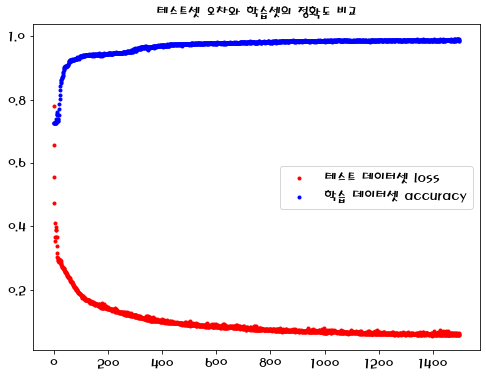

In [16]:
x_len = numpy.arange(len(acc))
plt.figure(figsize=(8,6))   
font_path = "C:\\Windows\\Fonts\\HMKMMAG.TTF"
font_name = matplotlib.font_manager.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name, size=14) 

# 학습 데이터셋의 accuracy는 파란색으로, 테스트 데이터셋의 loss는 빨간색으로 표시
plt.title('테스트셋 오차와 학습셋의 정확도 비교', fontsize=14)
plt.plot(x_len, vloss, "o", c="red",  markersize=3,  label='테스트 데이터셋 loss')
plt.plot(x_len, acc,   "o", c="blue", markersize=3,  label='학습 데이터셋 accuracy')
plt.legend() 

plt.show()